In [1]:
from jax import config
#config.update("jax_enable_x64", True)
config.update('jax_num_cpu_devices', 8)

In [2]:
#NBVAL_SKIP
import os

# Tell XLA to fake 2 host CPU devices
#os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=3'

# Only make GPU 0 and GPU 1 visible to JAX:
#os.environ['CUDA_VISIBLE_DEVICES'] = '6,7'

#os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]   = "false"

import jax

# Now JAX will list two CpuDevice entries
print(jax.devices())
# → [CpuDevice(id=0), CpuDevice(id=1)]

[CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3), CpuDevice(id=4), CpuDevice(id=5), CpuDevice(id=6), CpuDevice(id=7)]


In [3]:
# NBVAL_SKIP
#import os
#  os.environ['SPS_HOME'] = '/mnt/storage/annalena_data/sps_fsps'
#os.environ['SPS_HOME'] = '/home/annalena/sps_fsps'
os.environ['SPS_HOME'] = '/Users/annalena/Documents/GitHub/fsps'
#os.environ['SPS_HOME'] = '/export/home/aschaibl/fsps'
#os.environ['SPS_HOME'] = '/home/annalena_data/sps_fsps'

In [4]:
# NBVAL_SKIP
from rubix.spectra.ssp.factory import get_ssp_template
ssp_fsps = get_ssp_template("FSPS")

2025-06-16 10:36:07,779 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-06-16 10:36:07,780 - rubix - INFO - Rubix version: 0.0.post427+g131f0ec.d20250602
2025-06-16 10:36:07,780 - rubix - INFO - JAX version: 0.5.0
2025-06-16 10:36:07,780 - rubix - INFO - Running on [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3), CpuDevice(id=4), CpuDevice(id=5), CpuDevice(id=6), CpuDevice(id=7)] devices


In [5]:
# NBVAL_SKIP
metallicity_index = 8
age_index = 80

In [6]:
print(ssp_fsps.age[age_index])
print(ssp_fsps.metallicity[metallicity_index])

1.0
0.007985248


In [7]:
age_value = ssp_fsps.age[age_index]
metallicity_value = ssp_fsps.metallicity[metallicity_index]

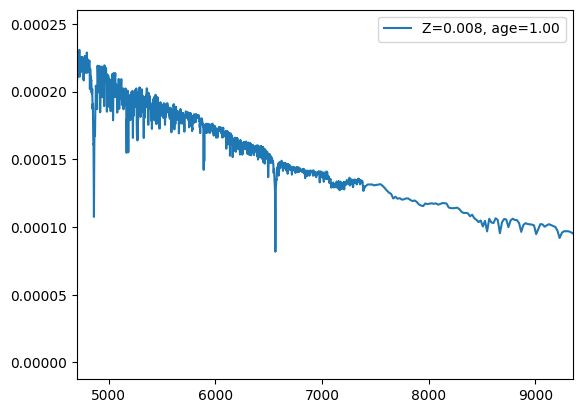

In [8]:
# NBVAL_SKIP
import matplotlib.pyplot as plt

plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[metallicity_index][age_index], label=r'Z=%0.3f, age=%0.2f'%(ssp_fsps.metallicity[metallicity_index] ,ssp_fsps.age[age_index]))
#plt.vlines(6563,0,5e-5, colors='r', label=r'H$\alpha$')
plt.xlim(4700.15, 9351.4)
plt.legend()

## Step 1: Config

In [9]:
#NBVAL_SKIP
import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os

galaxy_id = "g8.13e11"

config = {
    "pipeline":{"name": "calc_ifu_memory_test"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 12,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 10,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-12.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE_test",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 100,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 1e-10,
         "rotation": {"type": "edge-on"}, #{"alpha": 0.0, "beta": 0.0, "gamma":0.0},
         "component": None, #["Halo"], #None,
         "component_file": "./data/gsf/g8.26e11.01024.gmm_full_white_jzjcejpjc_5clusters_2018tags.dat",
        },
        
    "ssp": {
        "template": {
            "name": "FSPS" #"BruzualCharlot2003" #"Mastar_CB19_SLOG_1_5"
        },
        "dust": {
                "extinction_model": "Cardelli89",
                "dust_to_gas_ratio": 0.01,
                "dust_to_metals_ratio": 0.4,
                "dust_grain_density": 3.5,
                "Rv": 3.1,
            },
    },        
}

## Step 2: Pipeline yaml

## Step 3: Run the pipeline

After defining the `config` and the `pipeline_config` you can simply run the whole pipeline by these two lines of code.

In [10]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

/Users/annalena/Documents/GitHub/rubix/rubix/telescope/factory.py:26: UserWarning: No telescope config provided, using default stored in /Users/annalena/Documents/GitHub/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


In [11]:
inputdata = pipe.prepare_data()

2025-06-16 10:36:08,682 - rubix - INFO - Getting rubix data...
2025-06-16 10:36:08,683 - rubix - INFO - Loading data from IllustrisAPI
2025-06-16 10:36:08,683 - rubix - INFO - Reusing existing file galaxy-id-12.hdf5. If you want to download the data again, set reuse=False.
2025-06-16 10:36:08,704 - rubix - INFO - Loading data into input handler
2025-06-16 10:36:08,705 - rubix - DEBUG - Loading data from Illustris file..
2025-06-16 10:36:08,705 - rubix - DEBUG - Checking if the fields are present in the file...
2025-06-16 10:36:08,705 - rubix - DEBUG - Keys in the file: <KeysViewHDF5 ['Header', 'PartType4', 'SubhaloData']>
2025-06-16 10:36:08,706 - rubix - DEBUG - Expected fields: ['Header', 'SubhaloData', 'PartType4', 'PartType0']
2025-06-16 10:36:08,706 - rubix - DEBUG - Matching fields: {'Header', 'SubhaloData', 'PartType4'}
2025-06-16 10:36:08,708 - rubix - DEBUG - Found 649384 valid particles out of 649384
2025-06-16 10:36:08,920 - rubix - DEBUG - Converting Stellar Formation Time 

Converted to Rubix format!


2025-06-16 10:36:14,105 - rubix - WARNING - The Subset value is set in config. Using only subset of size 10 for stars
2025-06-16 10:36:14,107 - rubix - INFO - Data loaded with 10 star particles and 0 gas particles.


In [12]:
import jax.numpy as jnp
inputdata.stars.mass = jnp.full(10, 0.1, dtype=jnp.float32)
inputdata.stars.coords = jnp.zeros((10, 3), dtype=jnp.float32)
inputdata.stars.velocity = jnp.zeros((10, 3), dtype=jnp.float32)
inputdata.stars.age = jnp.full(10, age_value, dtype=jnp.float32)
inputdata.stars.metallicity = jnp.full(10, metallicity_value, dtype=jnp.float32)


In [13]:
#NBVAL_SKIP
rubixdata = pipe.run_sharded(inputdata)

2025-06-16 10:36:14,163 - rubix - INFO - Setting up the pipeline...
2025-06-16 10:36:14,164 - rubix - DEBUG - Pipeline Configuration: {'Transformers': {'rotate_galaxy': {'name': 'rotate_galaxy', 'depends_on': None, 'args': [], 'kwargs': {}}, 'filter_particles': {'name': 'filter_particles', 'depends_on': 'rotate_galaxy', 'args': [], 'kwargs': {}}, 'spaxel_assignment': {'name': 'spaxel_assignment', 'depends_on': 'filter_particles', 'args': [], 'kwargs': {}}, 'calculate_datacube_particlewise': {'name': 'calculate_datacube_particlewise', 'depends_on': 'spaxel_assignment', 'args': [], 'kwargs': {}}}}
2025-06-16 10:36:14,168 - rubix - DEBUG - Roataion Type found: edge-on
2025-06-16 10:36:14,172 - rubix - INFO - Calculating spatial bin edges...
/Users/annalena/Documents/GitHub/rubix/rubix/telescope/factory.py:26: UserWarning: No telescope config provided, using default stored in /Users/annalena/Documents/GitHub/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-06-16 10:36:14,189 - r

## Convert luminosity to flux

In [14]:
from rubix.spectra.ifu import convert_luminoisty_to_flux
from rubix.cosmology import PLANCK15

observation_lum_dist = PLANCK15.luminosity_distance_to_z(config["galaxy"]["dist_z"])
observation_z = config["galaxy"]["dist_z"]
pixel_size = 1.0
fluxcube = convert_luminoisty_to_flux(rubixdata, observation_lum_dist, observation_z, pixel_size)
rubixdata_flux = fluxcube/1e-20

## Store datacube in a fits file with header

In [15]:
#NBVAL_SKIP
from rubix.core.fits import store_fits

#if config_illustris["telescope"]["name"] == "MUSE_ultraWFM":
#    cutted_datatcube = data.stars.datacube[300:600, :, :]
#    data.stars.datacube = cutted_datatcube
#if config_illustris["telescope"]["name"] == "MUSE_WFM":
#    cutted_datatcube = data.stars.datacube[100:200, :, :]
#    data.stars.datacube = cutted_datatcube

#store_fits(config_NIHAO, rubixdata, "./output/813e11/")

## Step 4: Mock-data

Now we have our final datacube and can use the mock-data to do science. Here we have a quick look in the optical wavelengthrange of the mock-datacube and show the spectra of a central spaxel and a spatial image.

In [16]:
#NBVAL_SKIP
import jax.numpy as jnp

wave = pipe.telescope.wave_seq
# get the indices of the visible wavelengths of 4000-8000 Angstroms
visible_indices = jnp.where((wave >= 4000) & (wave <= 8000))


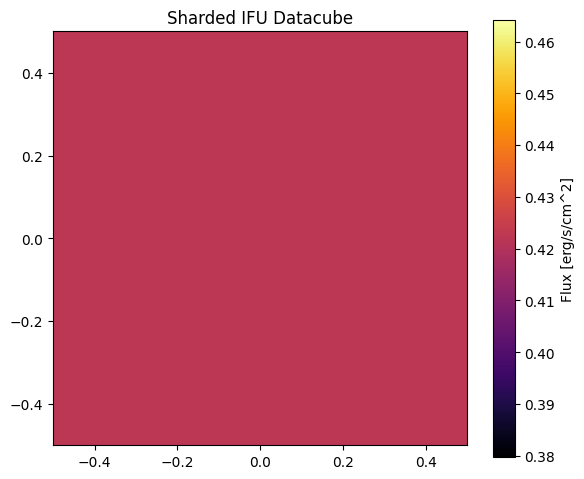

In [ ]:
#NBVAL_SKIP
import numpy as np
# get the spectra of the visible wavelengths from the ifu cube
#visible_spectra = rubixdata.stars.datacube[ :, :, visible_indices[0]]
#visible_spectra = rubixdata[ :, :, visible_indices[0]]
sharded_visible_spectra = rubixdata[ :, :, visible_indices[0]]
#visible_spectra.shape

#image = jnp.sum(visible_spectra, axis=2)
sharded_image = jnp.sum(sharded_visible_spectra, axis=2)
img32 = np.array(sharded_image, dtype=np.float32)

# Plot side by side
plt.figure(figsize=(6, 5))

# Original IFU datacube image
#im0 = axes[0].imshow(image, origin="lower", cmap="inferno")
#axes[0].set_title("Original IFU Datacube")
#fig.colorbar(im0, ax=axes[0])

# Sharded IFU datacube image
plt.imshow(img32, origin="lower", cmap="inferno")
plt.title("Sharded IFU Datacube")
plt.colorbar(label="Flux [erg/s/cm^2]")

plt.tight_layout()
#plt.savefig("./output/813e11/image_813e11.jpeg")
plt.show()

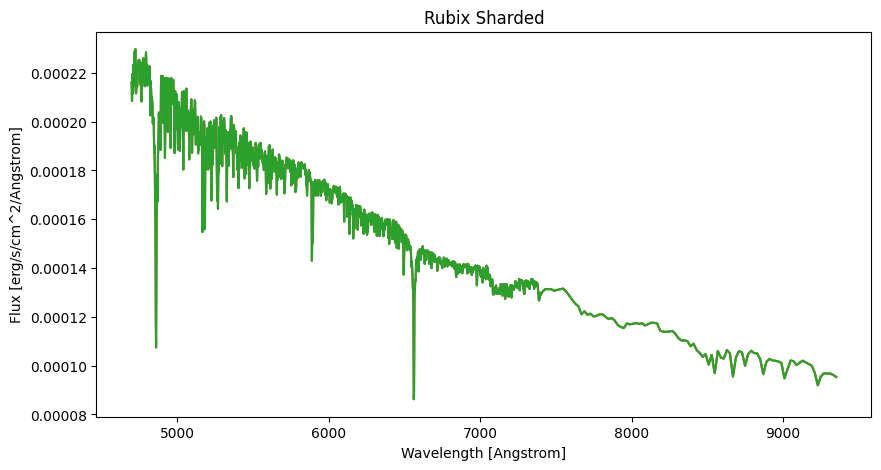

In [18]:
#NBVAL_SKIP
wave = pipe.telescope.wave_seq

#spectra = rubixdata#.stars.datacube # Spectra of all stars
spectra_sharded = rubixdata # Spectra of all stars
#print(spectra.shape)

plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#plt.title("Rubix")
#plt.xlabel("Wavelength [Angstrom]")
#plt.ylabel("Flux [erg/s/cm^2/Angstrom]")
#plt.plot(wave, spectra[12,12,:])
#plt.plot(wave, spectra[8,12,:])

#plt.subplot(1, 2, 2)
plt.title("Rubix Sharded")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Flux [erg/s/cm^2/Angstrom]")
plt.plot(wave, spectra_sharded[150,150,:])
plt.plot(wave, spectra_sharded[150,200,:])
plt.plot(wave, spectra_sharded[200,150,:])

#plt.savefig("./output/813e11/spectra_813e11.jpeg")
plt.show()

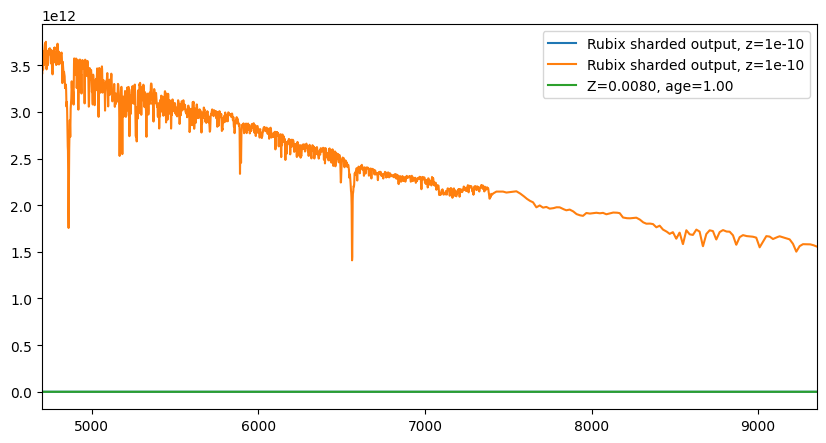

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(wave, spectra_sharded[0,0,:], label=f"Rubix sharded output, z={config['galaxy']['dist_z']}")
#plt.plot(wave, rubixdata_flux[0,0,:], label=f"Rubix sharded output, z={config['galaxy']['dist_z']}")
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[metallicity_index][age_index], label=r'Z=%0.4f, age=%0.2f'%(ssp_fsps.metallicity[metallicity_index] ,ssp_fsps.age[age_index]))
#plt.vlines(6563,0,5e-5, colors='r', label=r'H$\alpha$')
plt.xlim(4700.15, 9351.4)
plt.legend()

## DONE!

Congratulations, you have sucessfully run the RUBIX pipeline to create your own mock-observed IFU datacube! Now enjoy playing around with the RUBIX pipeline and enjoy doing amazing science with RUBIX :)